In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('real_drug_dataset.csv')
df.head()

,Patient_ID,Age,Gender,Condition,Drug_Name,Dosage_mg,Treatment_Duration_days,Side_Effects,Improvement_Score
0,P0001,56,Male,Infection,Ciprofloxacin,50,9,Nausea,8.5
1,P0002,69,Male,Hypertension,Metoprolol,500,24,Tiredness,8.7
2,P0003,46,Female,Depression,Bupropion,100,25,Dry mouth,5.4
3,P0004,32,Male,Diabetes,Glipizide,850,44,Low blood sugar,6.4
4,P0005,60,Male,Depression,Bupropion,850,35,Anxiety,5.3


In [3]:
df=df.drop(['Patient_ID'],axis=1, errors='ignore')
df.head()

,Age,Gender,Condition,Drug_Name,Dosage_mg,Treatment_Duration_days,Side_Effects,Improvement_Score
0,56,Male,Infection,Ciprofloxacin,50,9,Nausea,8.5
1,69,Male,Hypertension,Metoprolol,500,24,Tiredness,8.7
2,46,Female,Depression,Bupropion,100,25,Dry mouth,5.4
3,32,Male,Diabetes,Glipizide,850,44,Low blood sugar,6.4
4,60,Male,Depression,Bupropion,850,35,Anxiety,5.3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      1000 non-null   int64  
 1   Gender                   1000 non-null   object 
 2   Condition                1000 non-null   object 
 3   Drug_Name                1000 non-null   object 
 4   Dosage_mg                1000 non-null   int64  
 5   Treatment_Duration_days  1000 non-null   int64  
 6   Side_Effects             1000 non-null   object 
 7   Improvement_Score        1000 non-null   float64
dtypes: float64(1), int64(3), object(4)
memory usage: 62.6+ KB


In [5]:
df.isnull().sum()

,0
Age,0
Gender,0
Condition,0
Drug_Name,0
Dosage_mg,0
Treatment_Duration_days,0
Side_Effects,0
Improvement_Score,0


In [6]:
df['Gender'].value_counts()

,count
Gender,
Male,523
Female,477


In [7]:
df['Gender'] = df['Gender'].astype(str).str.strip().str.title()
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})
df.head()

,Age,Gender,Condition,Drug_Name,Dosage_mg,Treatment_Duration_days,Side_Effects,Improvement_Score
0,56,1,Infection,Ciprofloxacin,50,9,Nausea,8.5
1,69,1,Hypertension,Metoprolol,500,24,Tiredness,8.7
2,46,0,Depression,Bupropion,100,25,Dry mouth,5.4
3,32,1,Diabetes,Glipizide,850,44,Low blood sugar,6.4
4,60,1,Depression,Bupropion,850,35,Anxiety,5.3


In [8]:
columns_to_encode = ['Condition', 'Drug_Name', 'Side_Effects']
existing_columns = [col for col in columns_to_encode if col in df.columns]

if existing_columns:
    df = pd.get_dummies(df, columns=existing_columns, drop_first=True)
else:
    print("Warning: None of the specified columns for one-hot encoding were found in the DataFrame.")

df.head()

,Age,Gender,Dosage_mg,Treatment_Duration_days,Improvement_Score,Condition_Diabetes,Condition_Hypertension,Condition_Infection,Condition_Pain Relief,Drug_Name_Amoxicillin,...,Side_Effects_Rash,Side_Effects_Skin rash,Side_Effects_Sleep issues,Side_Effects_Slow heartbeat,Side_Effects_Stomach pain,Side_Effects_Stomach upset,Side_Effects_Sweating,Side_Effects_Swelling,Side_Effects_Tiredness,Side_Effects_Weight gain
0,56,1,50,9,8.5,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,69,1,500,24,8.7,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,46,0,100,25,5.4,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,32,1,850,44,6.4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,60,1,850,35,5.3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
for col in df.select_dtypes(include='bool').columns:
    df[col] = df[col].astype(int)

df.head()

,Age,Gender,Dosage_mg,Treatment_Duration_days,Improvement_Score,Condition_Diabetes,Condition_Hypertension,Condition_Infection,Condition_Pain Relief,Drug_Name_Amoxicillin,...,Side_Effects_Rash,Side_Effects_Skin rash,Side_Effects_Sleep issues,Side_Effects_Slow heartbeat,Side_Effects_Stomach pain,Side_Effects_Stomach upset,Side_Effects_Sweating,Side_Effects_Swelling,Side_Effects_Tiredness,Side_Effects_Weight gain
0,56,1,50,9,8.5,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,69,1,500,24,8.7,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,46,0,100,25,5.4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,32,1,850,44,6.4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,60,1,850,35,5.3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 52 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               1000 non-null   int64  
 1   Gender                            1000 non-null   int64  
 2   Dosage_mg                         1000 non-null   int64  
 3   Treatment_Duration_days           1000 non-null   int64  
 4   Improvement_Score                 1000 non-null   float64
 5   Condition_Diabetes                1000 non-null   int64  
 6   Condition_Hypertension            1000 non-null   int64  
 7   Condition_Infection               1000 non-null   int64  
 8   Condition_Pain Relief             1000 non-null   int64  
 9   Drug_Name_Amoxicillin             1000 non-null   int64  
 10  Drug_Name_Azithromycin            1000 non-null   int64  
 11  Drug_Name_Bupropion               1000 non-null   int64  
 12  Drug_Na

In [11]:
df.describe()

,Age,Gender,Dosage_mg,Treatment_Duration_days,Improvement_Score,Condition_Diabetes,Condition_Hypertension,Condition_Infection,Condition_Pain Relief,Drug_Name_Amoxicillin,...,Side_Effects_Rash,Side_Effects_Skin rash,Side_Effects_Sleep issues,Side_Effects_Slow heartbeat,Side_Effects_Stomach pain,Side_Effects_Stomach upset,Side_Effects_Sweating,Side_Effects_Swelling,Side_Effects_Tiredness,Side_Effects_Weight gain
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,49.857000,0.523000,352.650000,32.38000,7.015200,0.207000,0.194000,0.215000,0.20800,0.066000,...,0.047000,0.019000,0.021000,0.014000,0.02900,0.023000,0.016000,0.018000,0.02000,0.026000
std,18.114267,0.499721,295.419617,15.69809,1.425609,0.405358,0.395627,0.411028,0.40608,0.248406,...,0.211745,0.136593,0.143456,0.117549,0.16789,0.149978,0.125538,0.133018,0.14007,0.159215
min,18.000000,0.000000,50.000000,5.00000,2.500000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,35.000000,0.000000,100.000000,19.00000,6.100000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,50.000000,1.000000,250.000000,32.00000,7.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,66.000000,1.000000,500.000000,46.00000,8.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000
max,79.000000,1.000000,850.000000,59.00000,10.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000


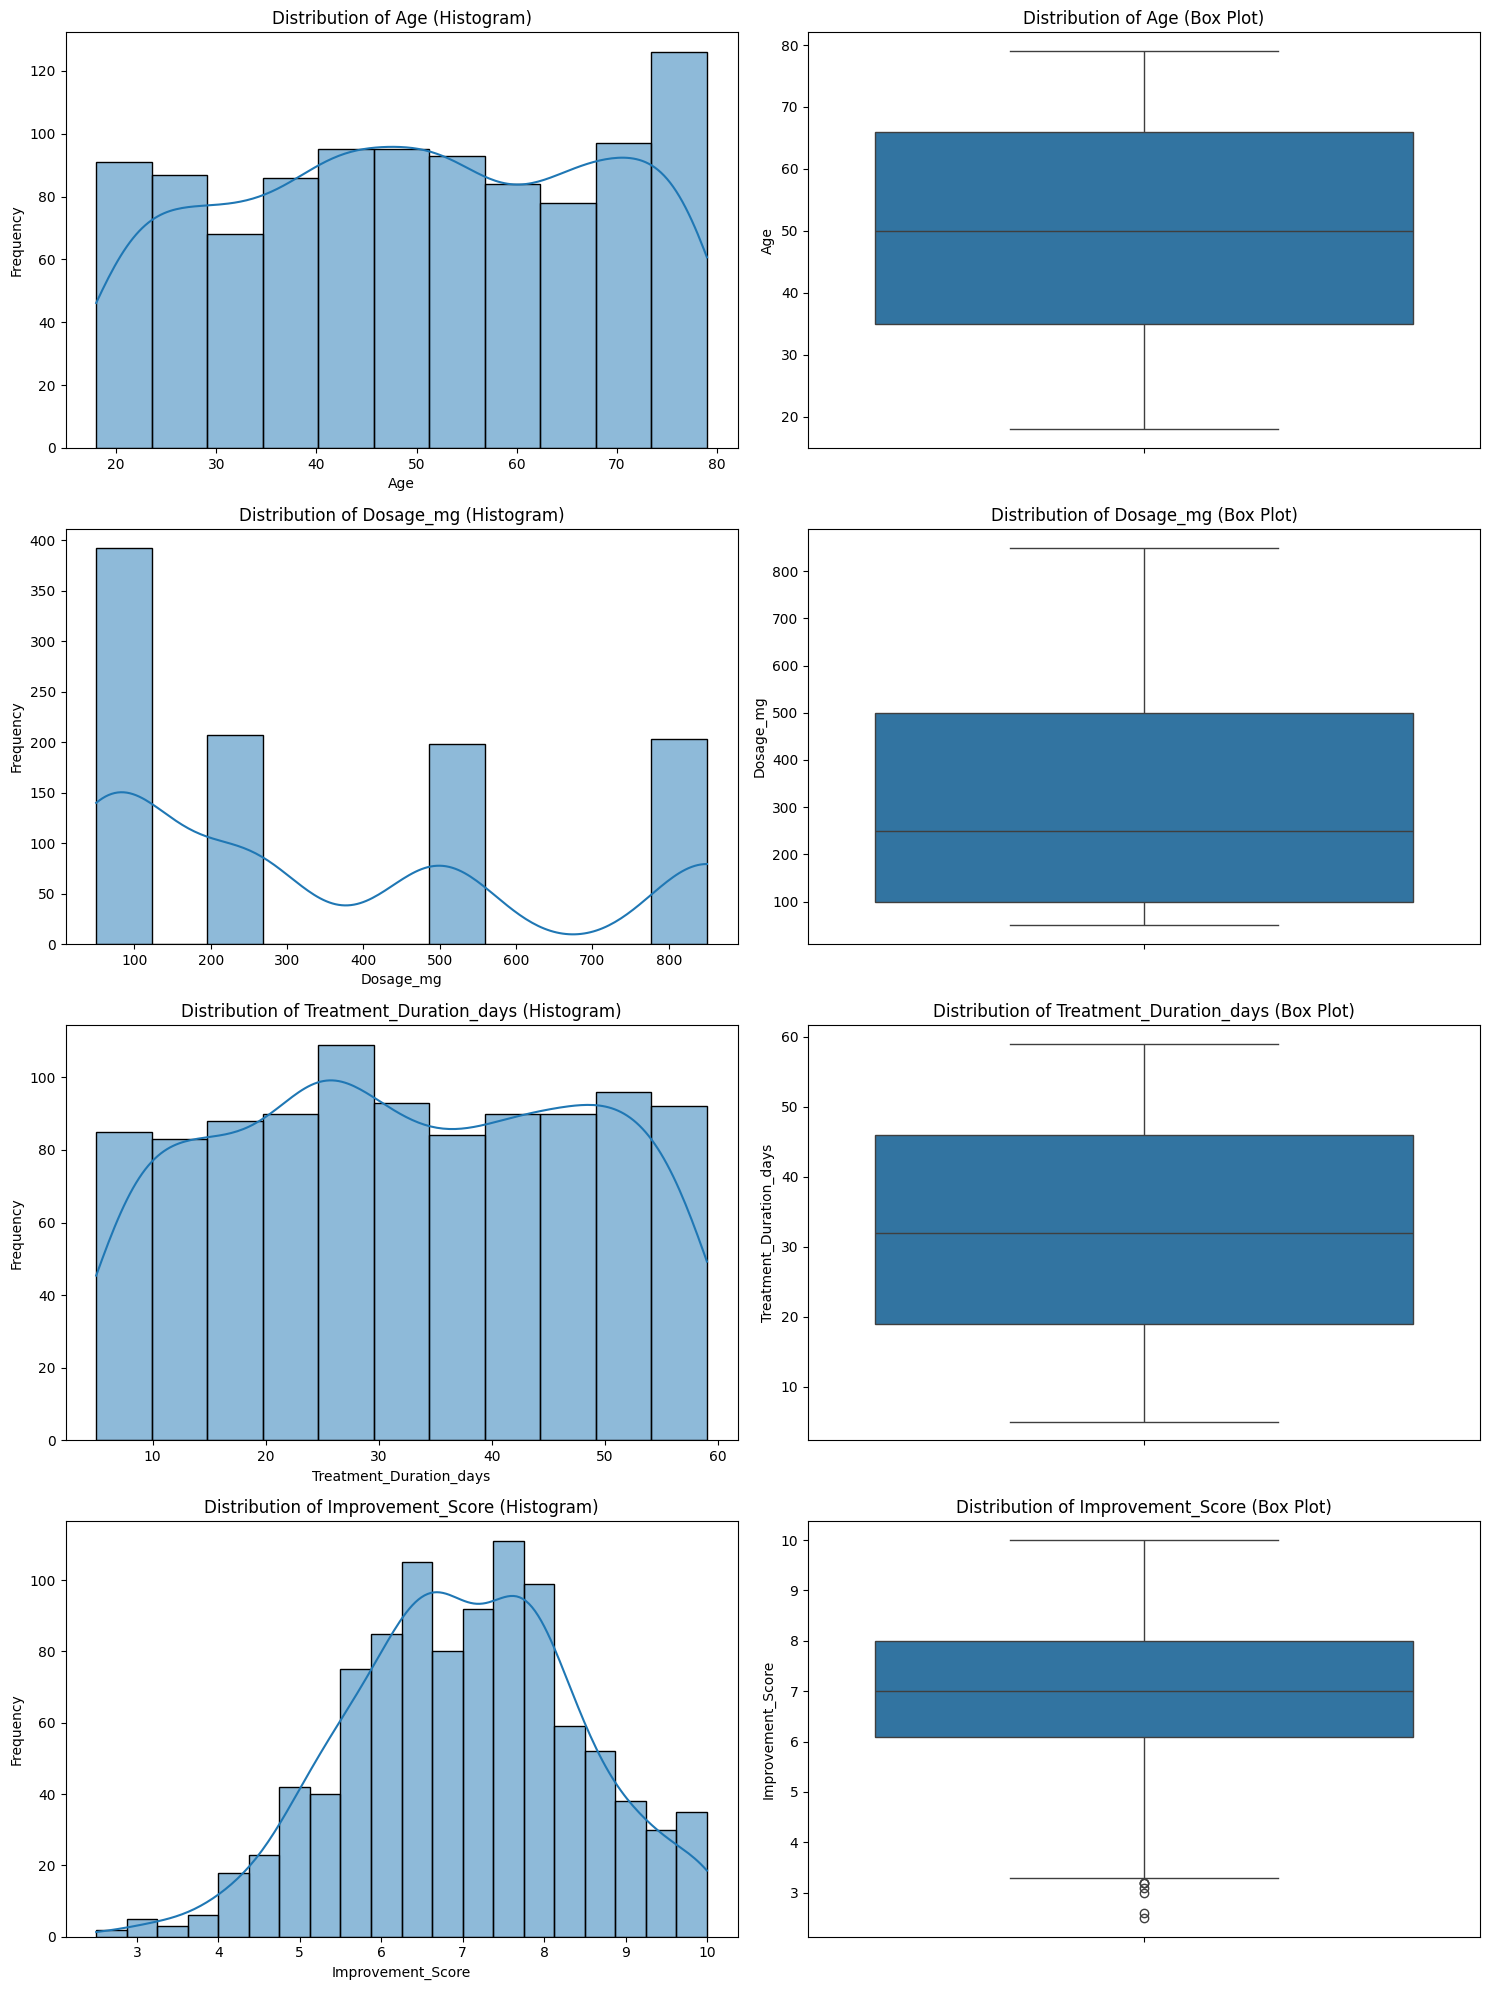

In [12]:
numerical_features = ['Age', 'Dosage_mg', 'Treatment_Duration_days', 'Improvement_Score']

plt.figure(figsize=(15, 20))

for i, col in enumerate(numerical_features):
    plt.subplot(len(numerical_features), 2, 2 * i + 1) # (rows, cols, index)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col} (Histogram)')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    plt.subplot(len(numerical_features), 2, 2 * i + 2)
    sns.boxplot(y=df[col])
    plt.title(f'Distribution of {col} (Box Plot)')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

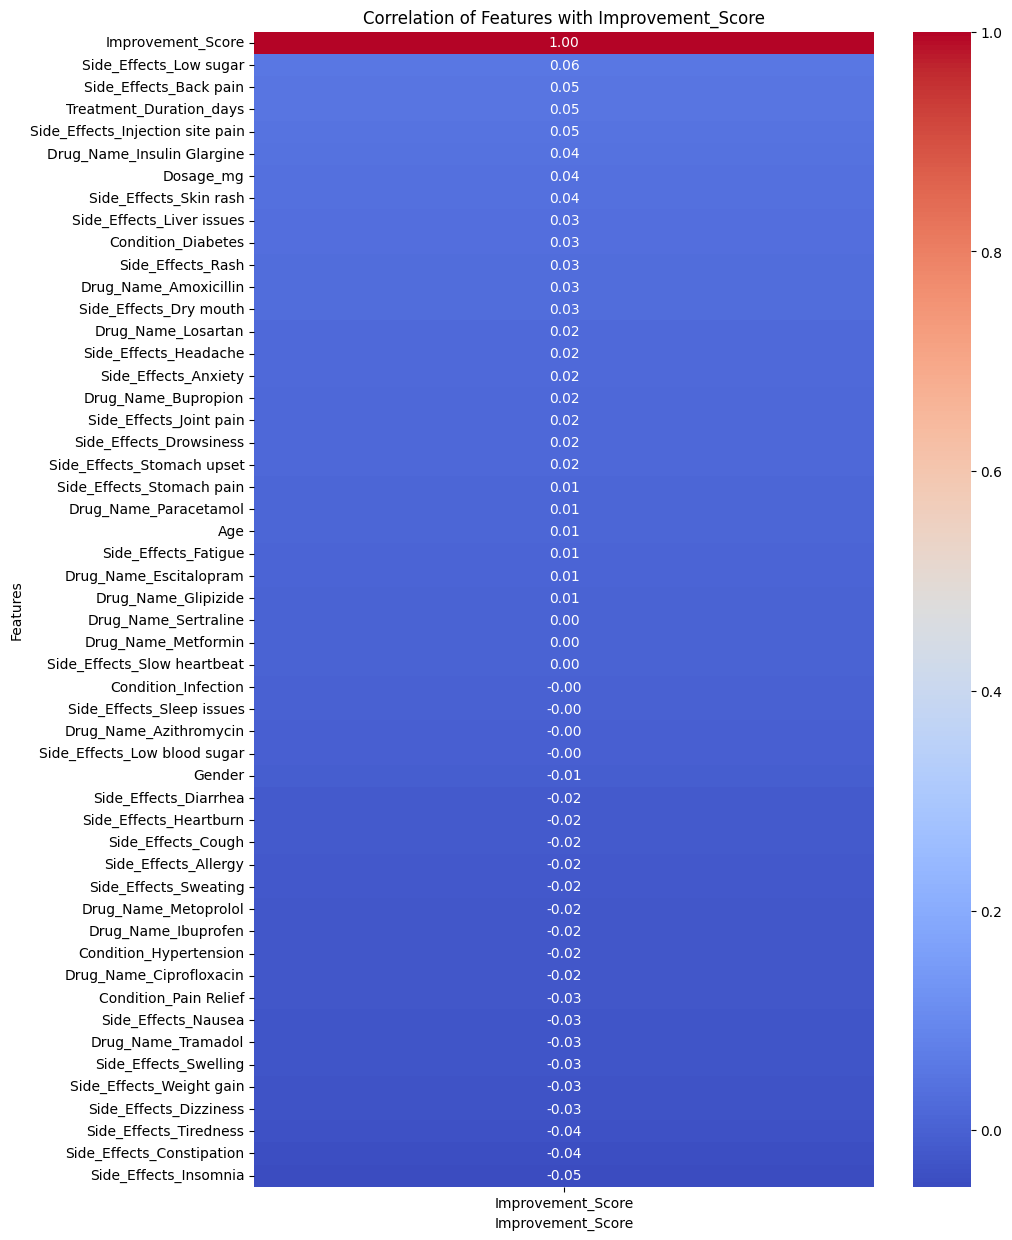

In [13]:
correlations = df.corr()['Improvement_Score'].sort_values(ascending=False)
plt.figure(figsize=(10, 15))
sns.heatmap(correlations.to_frame(), annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Correlation of Features with Improvement_Score')
plt.ylabel('Features')
plt.xlabel('Improvement_Score')
plt.show()

In [14]:
from sklearn.ensemble import RandomForestRegressor
X = df.drop(columns=['Improvement_Score'])
y = df['Improvement_Score']

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

importances = pd.Series(model.feature_importances_, index=X.columns)
required_features = importances[importances > 0.05].index.tolist()

context_cols_prefix = ['Condition', 'Drug_Name']

encoded_context_cols = []
for col in df.columns:
    for prefix in context_cols_prefix:
        if col.startswith(prefix + '_'):
            encoded_context_cols.append(col)
            break

final_cols = list(set(required_features + encoded_context_cols + ['Improvement_Score']))
final_df = df[final_cols]

print(f"Features selected: {final_cols}")
print(final_df.head())

Features selected: ['Dosage_mg', 'Drug_Name_Sertraline', 'Drug_Name_Ciprofloxacin', 'Condition_Diabetes', 'Age', 'Drug_Name_Metformin', 'Drug_Name_Bupropion', 'Drug_Name_Amoxicillin', 'Drug_Name_Losartan', 'Condition_Pain Relief', 'Drug_Name_Glipizide', 'Drug_Name_Ibuprofen', 'Drug_Name_Tramadol', 'Drug_Name_Escitalopram', 'Treatment_Duration_days', 'Condition_Hypertension', 'Drug_Name_Metoprolol', 'Improvement_Score', 'Condition_Infection', 'Drug_Name_Insulin Glargine', 'Drug_Name_Paracetamol', 'Drug_Name_Azithromycin']
   Dosage_mg  Drug_Name_Sertraline  Drug_Name_Ciprofloxacin  \
0         50                     0                        1   
1        500                     0                        0   
2        100                     0                        0   
3        850                     0                        0   
4        850                     0                        0   

   Condition_Diabetes  Age  Drug_Name_Metformin  Drug_Name_Bupropion  \
0                   0 

In [15]:
final_df.head()

,Dosage_mg,Drug_Name_Sertraline,Drug_Name_Ciprofloxacin,Condition_Diabetes,Age,Drug_Name_Metformin,Drug_Name_Bupropion,Drug_Name_Amoxicillin,Drug_Name_Losartan,Condition_Pain Relief,...,Drug_Name_Tramadol,Drug_Name_Escitalopram,Treatment_Duration_days,Condition_Hypertension,Drug_Name_Metoprolol,Improvement_Score,Condition_Infection,Drug_Name_Insulin Glargine,Drug_Name_Paracetamol,Drug_Name_Azithromycin
0,50,0,1,0,56,0,0,0,0,0,...,0,0,9,0,0,8.5,1,0,0,0
1,500,0,0,0,69,0,0,0,0,0,...,0,0,24,1,1,8.7,0,0,0,0
2,100,0,0,0,46,0,1,0,0,0,...,0,0,25,0,0,5.4,0,0,0,0
3,850,0,0,1,32,0,0,0,0,0,...,0,0,44,0,0,6.4,0,0,0,0
4,850,0,0,0,60,0,1,0,0,0,...,0,0,35,0,0,5.3,0,0,0,0


## Box Plot and Outlier Removal

### Subtask:
Generate box plots for numerical features in `final_df` to visualize outliers, and then remove outliers using the IQR method. Display the shape of the DataFrame before and after removal.


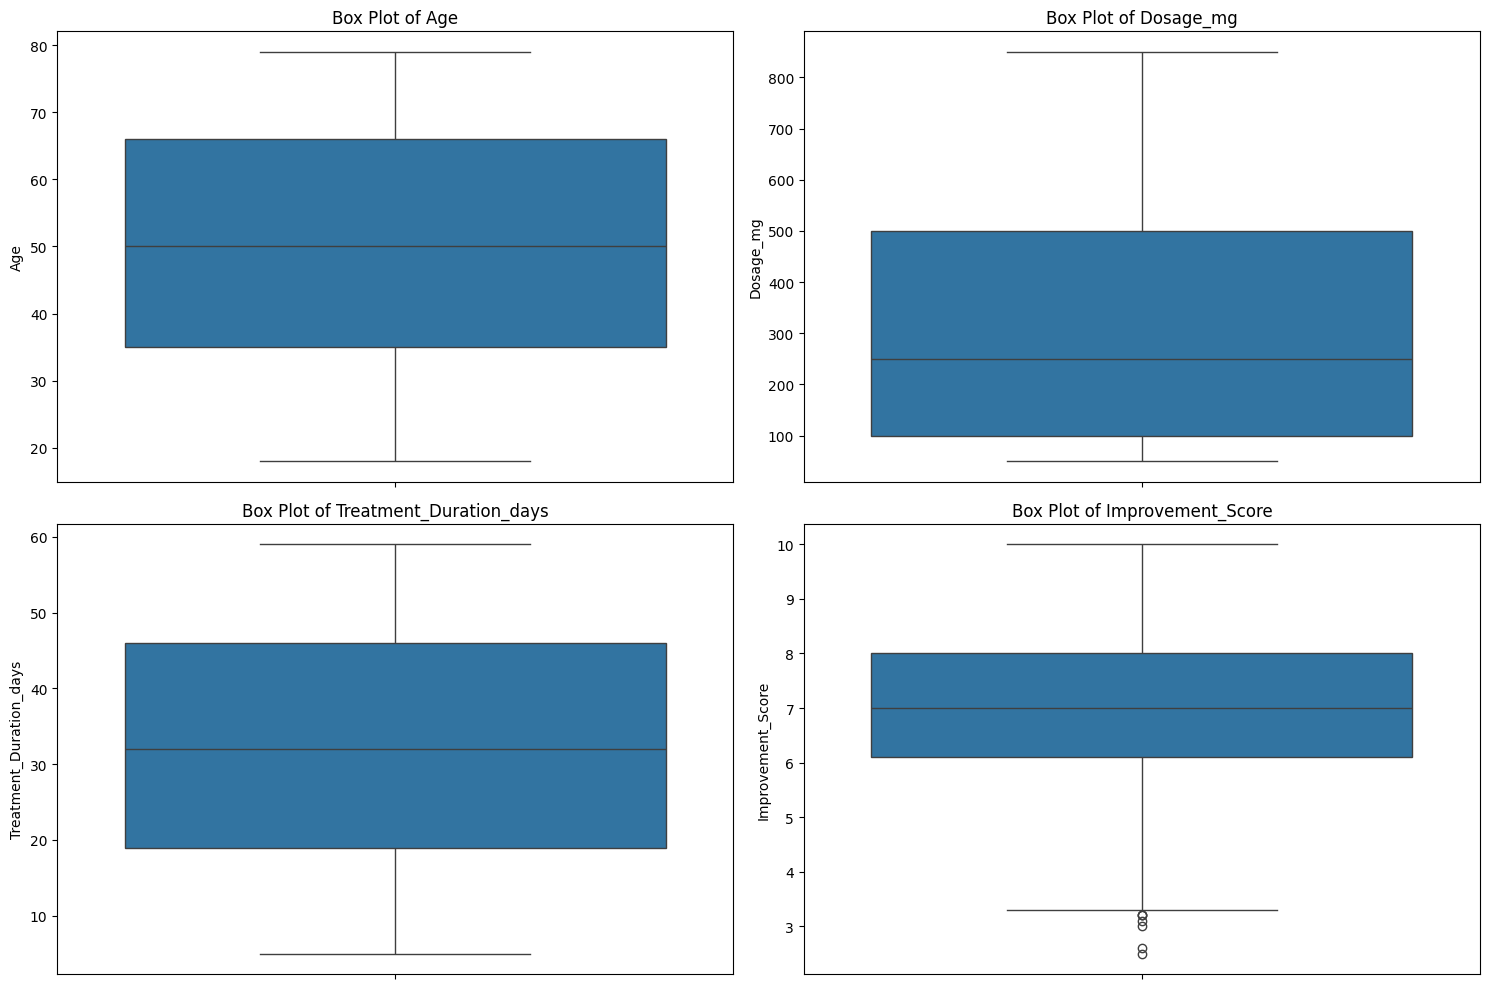

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = ['Age', 'Dosage_mg', 'Treatment_Duration_days', 'Improvement_Score']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(y=final_df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

In [17]:
print(f"Shape of DataFrame before outlier removal: {final_df.shape}")

df_no_outliers = final_df.copy()

for col in numerical_cols:
    Q1 = df_no_outliers[col].quantile(0.25)
    Q3 = df_no_outliers[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_no_outliers = df_no_outliers[(df_no_outliers[col] >= lower_bound) & (df_no_outliers[col] <= upper_bound)]

print(f"Shape of DataFrame after outlier removal: {df_no_outliers.shape}")


Shape of DataFrame before outlier removal: (1000, 22)
Shape of DataFrame after outlier removal: (993, 22)


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

X = final_df.drop('Improvement_Score', axis=1)
y = final_df['Improvement_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scalar=StandardScaler()
scalar.fit(X_train)
X_train_scaled=scalar.transform(X_train)
X_test_scaled=scalar.transform(X_test)

In [19]:
def evaluation(y_test,y_pred) :
  r2 = r2_score(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)
  rmse = np.sqrt(mse)

  print(f'R-squared: {r2:.3f}')
  print(f'Mean Squared Error (MSE): {mse:.3f}')
  print(f'Root Mean Squared Error (RMSE): {rmse:.3f}')

In [20]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train_scaled,y_train)
y_pred=lr.predict(X_test_scaled)
evaluation(y_test,y_pred)

R-squared: -0.041
Mean Squared Error (MSE): 2.193
Root Mean Squared Error (RMSE): 1.481


In [21]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(X_train_scaled,y_train)
y_pred=dt.predict(X_test_scaled)
evaluation(y_test,y_pred)

R-squared: -0.888
Mean Squared Error (MSE): 3.976
Root Mean Squared Error (RMSE): 1.994


In [22]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(X_train_scaled,y_train)
y_pred=svr.predict(X_test_scaled)
evaluation(y_test,y_pred)

R-squared: -0.078
Mean Squared Error (MSE): 2.270
Root Mean Squared Error (RMSE): 1.507


In [23]:
from xgboost import XGBRegressor
xgb=XGBRegressor()
xgb.fit(X_train_scaled,y_train)
y_pred=xgb.predict(X_test_scaled)
evaluation(y_test,y_pred)

R-squared: -0.342
Mean Squared Error (MSE): 2.826
Root Mean Squared Error (RMSE): 1.681


In [24]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': [100, 200, 300, 500, 700, 1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, 40, 50, None], # None means no limit
    'min_samples_split': [2, 5, 10, 15, 100],
    'min_samples_leaf': [1, 2, 4, 10]
}

rf = RandomForestRegressor(random_state=42)
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_grid,
                               n_iter=50, cv=5, verbose=2, random_state=42, n_jobs=-1)

rf_random.fit(X_train_scaled, y_train)

print("\nBest Parameters found by RandomizedSearchCV:")
print(rf_random.best_params_)

best_rf_model = rf_random.best_estimator_
print("\nBest RandomForestRegressor model stored.")

Fitting 5 folds for each of 50 candidates, totalling 250 fits

Best Parameters found by RandomizedSearchCV:
{'n_estimators': 500, 'min_samples_split': 100, 'min_samples_leaf': 10, 'max_features': 'log2', 'max_depth': None}

Best RandomForestRegressor model stored.


In [25]:
print("\n--- Tuned Random Forest Evaluation ---")
y_pred_tuned_rf = best_rf_model.predict(X_test_scaled)
evaluation(y_test, y_pred_tuned_rf)


--- Tuned Random Forest Evaluation ---
R-squared: -0.021
Mean Squared Error (MSE): 2.151
Root Mean Squared Error (RMSE): 1.467


In [26]:
import joblib

joblib.dump(best_rf_model, 'drug_model.pkl')
joblib.dump(scalar, 'scalar.pkl')


['scalar.pkl']

## Summary of Analysis Steps:

*   **Data Loading and Initial Inspection**: The process began by loading the `real_drug_dataset.csv` file into a pandas DataFrame, removing the 'Patient_ID' column, and then performing initial checks for data types, non-null values, and missing values using `df.info()` and `df.isnull().sum()`.

*   **Data Preprocessing - Categorical Features**: The 'Gender' column was converted into numerical format by mapping 'Female' to 0 and 'Male' to 1. Other categorical columns like 'Condition', 'Drug_Name', and 'Side_Effects' were then one-hot encoded using `pd.get_dummies()` and the resulting boolean columns were converted to integers (0s and 1s).

*   **Exploratory Data Analysis (EDA)**: Descriptive statistics were generated using `df.describe()`. Histograms and box plots were created for numerical features ('Age', 'Dosage_mg', 'Treatment_Duration_days', 'Improvement_Score') to visualize their distributions and identify potential outliers. A heatmap displayed the correlation of all features with the 'Improvement_Score'.

*   **Feature Selection**: A RandomForestRegressor model was trained to determine the importance of features in predicting 'Improvement_Score'. Features with an importance score greater than 0.05, along with all original 'Condition' and 'Drug_Name' related encoded columns, were selected to create `final_df`.

*   **Outlier Handling**: Box plots for the numerical columns in `final_df` were generated to visually inspect for outliers. Outliers in 'Age', 'Dosage_mg', 'Treatment_Duration_days', and 'Improvement_Score' were then removed using the Interquartile Range (IQR) method, reducing the DataFrame from 1000 to 993 rows.

*   **Model Training and Evaluation Setup**: The data was split into training and testing sets (80/20 split), and numerical features were scaled using `StandardScaler`. A custom `evaluation` function was defined to calculate and print R-squared, Mean Squared Error (MSE), and Root Mean Squared Error (RMSE).

*   **Baseline Model Training and Evaluation**: Several regression models including Linear Regression, Decision Tree Regressor, Support Vector Regressor (SVR), and XGBoost Regressor were trained on the scaled training data. Their performance was evaluated on the test set using the `evaluation` function.

*   **Hyperparameter Tuning (Random Forest)**: Randomized Search with Cross-Validation was used to find the best hyperparameters for a RandomForestRegressor model. The `param_grid` included options for `n_estimators`, `max_features`, `max_depth`, `min_samples_split`, and `min_samples_leaf`.

*   **Tuned Random Forest Evaluation**: The best RandomForestRegressor model found through Randomized Search was evaluated on the test set. Its performance metrics (R-squared, MSE, RMSE) were printed to assess the improvement after tuning.

*   **Model Saving**: The best performing tuned Random Forest model and the `StandardScaler` object were saved to disk using `joblib.dump` as `drug_model.pkl` and `scalar.pkl` respectively, for future use.